In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


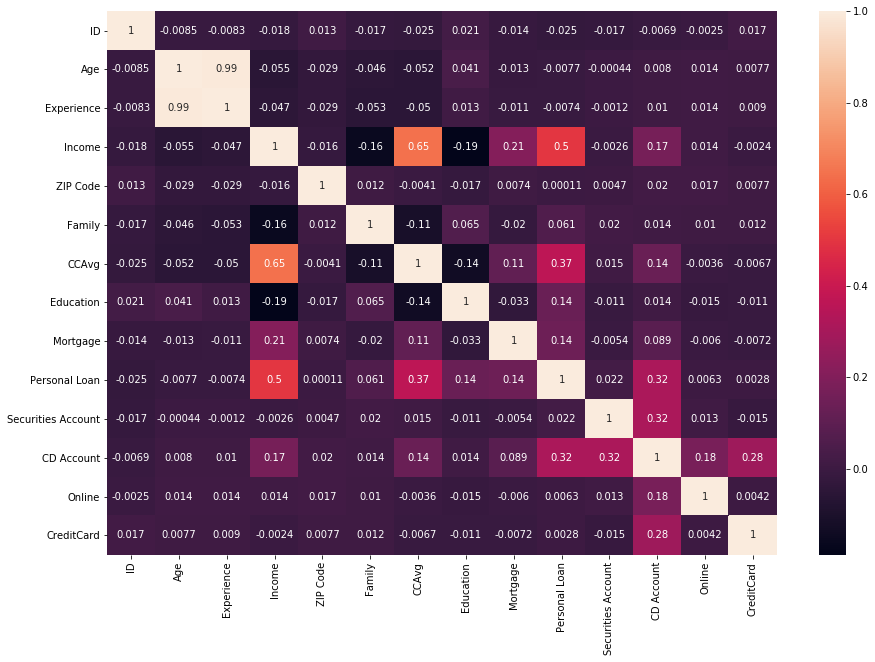

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

# X And Y Variables

In [11]:
X = df.drop(["Personal Loan","ID","ZIP Code"],axis=1)
Y = df["Personal Loan"]

In [12]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

# Train and Test Splitting

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

# Model Building Using Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lm1 = LogisticRegression()

lm1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Score of Model (Using Test Data (ie. the Unseen Data))

In [17]:
lm1.score(x_test,y_test)

0.9526666666666667

# Alternate Method Using StatsModel.api

In [18]:
import statsmodels.api as sm


In [19]:
x1= sm.add_constant(x_train)

logistic = sm.Logit(y_train,x1)

result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.130780
         Iterations 9


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.5992
Time:                        20:17:20   Log-Likelihood:                -457.73
converged:                       True   LL-Null:                       -1142.2
                                        LLR p-value:                6.188e-287
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.1688      1.937     -5.767      0.000     -14.965      -7.373
Age                   -0.0934      0.072     -1.292      0.196      -0.235       0.048
Experience             0.0996      0.072      1.392      0.164      -0.041       0.240
Income                 0.0535      0.003     17.303      0.000       0.047       0.060
Family                 0.6412      0.087      7.368      0.000       0.471       0.812
CCAvg                  0.1857      0.048      3.874      0.000       0.092       0.280
Education              1.8320      0.139     13.224      0.000       1.560       2.103
Mortgage               0.0009      0.001      1.336      0.182      -0.000       0.002
Securities Account    -0.8386      0.327     -2.567      0.010      -1.479      -0.198
CD Account             3.7854      0.376     10.077      0.000       3.049       4.522
Online                -0.8492      0.187     -4.535      0.000      -1.216      -0.482
CreditCard            -1.0731      0.238     -4.511      0.000      -1.539      -0.607
======================================================================================
"""